### Crowdedness at the Campus Gym
Number of attendees every 10 minutes from the last year in the gym

Here we are going to apply Principal component analysis on the given dataset using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).Features with little variance in the data are then projected into new lower dimension. Then the models are  trained on transformed dataset to apply machine learning models.Then I have applied  Random forest Regressor on old and the transformed datasets and compared them.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
#!pip install numpy

In [3]:
df=pd.read_csv('data/data.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [6]:
df.columns.values

array(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'], dtype=object)

Let us find if there is any relationship between temperature and apparent_temperature

The temperture given here is in fahrenheit.We will convert it into Celsius using the formula 
**Celsius=(Fahrenheit-32)* (5/9)**

In [7]:
Fahrenheit=df['temperature']

In [9]:
type(Fahrenheit)

pandas.core.series.Series

Converting it into the list so we can apply lambda function

In [11]:
F=Fahrenheit.tolist()

In [13]:
F[:10]

[71.76, 71.76, 71.76, 71.76, 71.76, 72.15, 72.15, 72.15, 72.15, 72.15]

Applying Lambda function

In [15]:
C = map(lambda x: (float(5)/9)*(x-32),F)
Celsius=(list(C))
Celsius[:10], F[:10]

([22.088888888888892,
  22.088888888888892,
  22.088888888888892,
  22.088888888888892,
  22.088888888888892,
  22.30555555555556,
  22.30555555555556,
  22.30555555555556,
  22.30555555555556,
  22.30555555555556],
 [71.76, 71.76, 71.76, 71.76, 71.76, 72.15, 72.15, 72.15, 72.15, 72.15])

Converting list to series

In [17]:
temperature_celsius = pd.Series(Celsius)
temperature_celsius

0        22.088889
1        22.088889
2        22.088889
3        22.088889
4        22.088889
           ...    
62179    16.150000
62180    16.150000
62181    13.727778
62182    13.727778
62183    13.727778
Length: 62184, dtype: float64

Applying the series to temperature column

In [18]:
df['temperature']= temperature_celsius
df['temperature']
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,22.088889,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,22.088889,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,22.088889,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,22.088889,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,22.088889,0,0,8,17


Thus we have converted the temperature column from fahrenheit to degree celsius.Similarly we are now converting apparent_temperature to degree celsius.

In [19]:
df['apparent_temperature']= temperature_celsius
df['apparent_temperature']
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,apparent_temperature
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,22.088889,0,0,8,17,22.088889
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,22.088889,0,0,8,17,22.088889
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,22.088889,0,0,8,17,22.088889
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,22.088889,0,0,8,17,22.088889
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,22.088889,0,0,8,17,22.088889


In [20]:
X = df.iloc[:,2:8]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
#X
#y

In [22]:
X.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester
0,61211,4,0,0,22.088889,0
1,62414,4,0,0,22.088889,0
2,63015,4,0,0,22.088889,0
3,63616,4,0,0,22.088889,0
4,64217,4,0,0,22.088889,0


In [23]:
y.head()

0    37
1    45
2    40
3    44
4    45
Name: number_people, dtype: int64

In [24]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,apparent_temperature
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049,0.373327
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077,0.184849
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914,0.011169
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517,0.020673
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843,-0.088527
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121,1.000000
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091,0.093242
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581,0.152476
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624,0.063125
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000,0.185121


Text(0.5, 1, 'Correlation between different fearures')

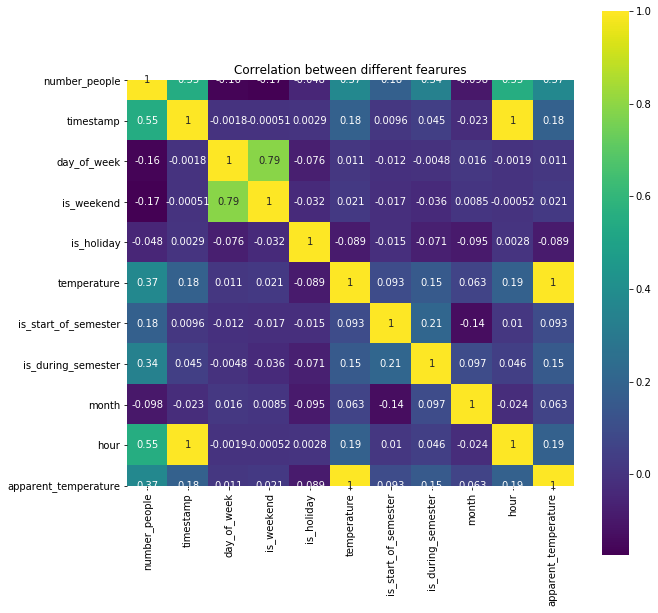

In [25]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Standardising data

##### The Standard Scaler
The idea behind Standard Scaler is that it will transform your data, such that the distribution will have a mean value of 0 and a standard deviation of 1.

In [26]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.68623792,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       [ 0.71106127,  0.50956119, -0.6280507 , -0.05079022,  2.09027384,
        -0.29253482],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.96515979,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482],
       [ 0.99010704,  1.01036016,  1.59222814, -0.05079022, -0.292433  ,
        -0.29253482]])

##### Principal Component Analysis
Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497,
         0.83101258],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183,
         0.83090197],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247,
         0.8308467 ],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787,
        -0.41471388],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368,
        -0.41476969],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627,
        -0.41482523]])

In [29]:
X.shape

(62184, 6)

In [30]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [31]:
pca.get_covariance().shape

(6, 6)

##### Explained Variance Ratio

Ratio between the variance of that principal component and the total variance. For several principal components, add up their variances and divide by the total variance.

In [32]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ,
       0.03454679])

In [33]:
X.shape

(62184, 6)

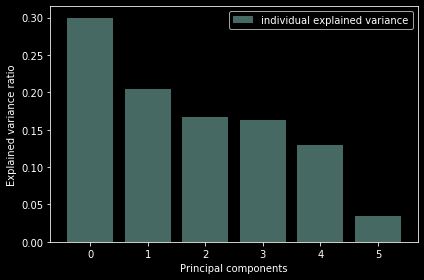

In [34]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [56]:
df.iloc[:,2:8].head(1)

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester
0,61211,4,0,0,22.088889,0


**Thus we can see from the above plot that  first two components constitute almost 55% of the variance.Third,fourth and fifth components has 42% of the data sprad.The last component has less than 5% of the variance.Hence we can drop the fifth component  **

In [45]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[-0.01221225, -1.74827045,  0.50960639, -0.41110148,  1.15793497],
       [-0.01252094, -1.77681605,  0.53746942, -0.41502514,  1.12857183],
       [-0.01267515, -1.79107699,  0.55138936, -0.41698533,  1.11390247],
       ...,
       [-1.83407039, -0.15801062,  0.73716585, -0.15999954, -0.69546787],
       [-1.83422615, -0.17241393,  0.75122475, -0.16197931, -0.71028368],
       [-1.83438114, -0.18674606,  0.76521417, -0.16394929, -0.72502627]])

 pca model is saved into either json, joblib or  pickle  format
##### For calling the pca model for use in prediction
'''
import pickle
f = file open  for pickle file having the pca model
pca_model =  pickle.open(f, 'rb')
''''


Now, take the pca model,
apply 
##### pca_model.transform([X_predict_row_0]) ##returns the  transformed data with n(5) components

In [42]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00]])

In [46]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30002086, 0.20478764, 0.16750837, 0.16320645, 0.1299299 ])

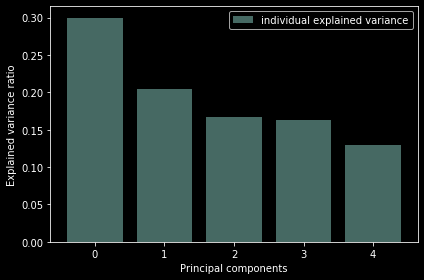

In [47]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 6)

In [51]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [54]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train) 
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.8392155660507712, 0.8454017702209817, 0.848405643254022, 0.851476235824966, 0.8503935167293567, 0.8517718106518087, 0.8522802534918836, 0.8532074180202264, 0.8535797079185569, 0.8531085417890341, 0.8547051731284545, 0.8532827745609669, 0.8541992036779279, 0.8533060060048065, 0.8536192835961074, 0.8537440664520631, 0.8546873317698266, 0.8542297092722807, 0.8546950733692114]


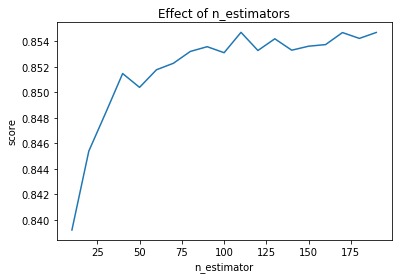

In [57]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### Run the following cells by yourself

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 5)

In [35]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [36]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.6906284654040767, 0.706587368825234, 0.7089430004104734, 0.7099192441756164, 0.7122663970517894, 0.7130580082177007, 0.7129525314183531, 0.7130993902110341, 0.7140558119125999, 0.7131459341738542, 0.7133793052474161, 0.7145896246609854, 0.714403723964558, 0.7143286965505653, 0.7132801285031474, 0.7142356265080121, 0.7150085701390211, 0.7148844099115936, 0.7146387156152603]


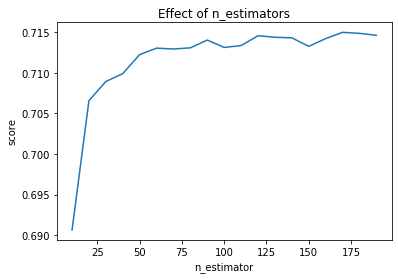

In [37]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)